# Исследование объявлений о продаже квартир

    В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим  рыночную стоимость объектов недвижимости. Наша задача — установить параметры, влияющие на нее. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

    По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## 1. Импорт и анализ первоначальных данных. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Импортируем искходную таблицу
df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
# Оцениваем основные показатели таблицы 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Оцениваем основные показатели столбцов
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
# Смотрим на количество уникальных значений по апартаментам
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [5]:
# Смотрим на количество уникальных значений по студиям
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [6]:
# Смотрим на количество уникальных значений по свободной планировке
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [7]:
# Смотрим на количество уникальных значений населенных пунктов
df['locality_name'].value_counts()

Санкт-Петербург          15721
посёлок Мурино             522
посёлок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
деревня Кисельня             1
деревня Пчева                1
село Никольское              1
поселок Цвылёво              1
деревня Большой Сабск        1
Name: locality_name, Length: 364, dtype: int64

In [8]:
# Смотрим на количество уникальных значений "число водоёмов в радиусе 3 км"
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [9]:
# Смотрим на количество уникальных значений по времени размещения объявления
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

## Выводы по начальным данным
* total_images - вполне корректные реалистичные данные, пропусков нет, тип данных соответствует. Медиана и среднее примерно равны, соответственно каких-то выбросов нет.
* last_price - вполне корректные реалистичные данные, с учетом точто разброс в цене может быть действительно огромным. Пропусков нет. Для наилучшего восприятия переведем в размерность тыс.руб и сделаем целым
* total_area - вполне корректные реалистичные данные, пропусков нет, тип данных соответствует
* first_day_exposition - все данные на месте, надо привести к типу дата, для того чтобы в дальнейшем можно было выполнять операции 
* rooms - вполне корректные реалистичные данные, присутствие нулей можно объяснить наличием студий, где всего одно помещение. Тип данных соответствует
* ceiling_height - части данных не хватает, заполним медианными значениями в разрезе локаций
* floors_total - количество этажей может быть только целым числом, делаем преобразования. 
* living_area - не хватает примерно 10% данных. Заполним их медианой в зависимости от месторасположения и количества этажей.
* floor - вполне корректные реалистичные данные, пропусков нет, тип данных соответствует.
* is_apartment - непонятный столбец, очень мало значений, всего 50 положительных, с учетом того что никаких задач с его участием решать не надо, можно оставить его как есть
* studio - пропусков нет, но положительных значений крайне мало. Не используется при анализе, оставляем как есть.
* open_plan - пропусков нет, но положительных значений крайне мало. Не используется при анализе, оставляем как есть.
* kitchen_area - не хватает примерно 10% данных. Заполним их медианой в зависимости от месторасположения и количества этажей.
* balcony - не хватает 50% данных, но скорее всего отсутствие данных означает отсутствие балкона, поэтому заполняем пустые данные нулями.
* locality_name - есть 99% данных, недостающий 1% исключаем из выборки. Категориальный тип, дублей нет. 
* airports_nearest - есть около 76% данных, скорее всего параметр был заполнен только для Санкт-Петербурга (без области). Не используется при анализе, оставляем как есть. 
* cityCenters_nearest - есть около 76% данных, скорее всего параметр был заполнен только для Санкт-Петербурга (без области). Для области значения будут еще больше чем в Санкт-Петербурге. Для области расстояние до центра большой роли не играет. 
* parks_around3000 - есть около 76% данных, скорее всего параметр был заполнен только для Санкт-Петербурга (без области). Тип данных преводим в целые числа. Не используется при анализе, оставляем как есть. 
* parks_nearest - параметр соответствует количеству парков. Тип данных преводим в целые числа. Не используется при анализе, оставляем как есть.     
* ponds_around3000 - есть около 76% данных, скорее всего параметр был заполнен только для Санкт-Петербурга (без области). Тип данных преводим в целые числа. Не используется при анализе, оставляем как есть.       
* ponds_nearest - параметр соответствует количеству водоемов.Тип данных преводим в целые числа. Не используется при анализе, оставляем как есть. 
* days_exposition - есть около 86% данных.Максмальное количество 1580 дней = 4,3 года, что укладываеся в легенду. Т.к. дни целые числа, то меняем тип данных. Если заполнять пропуски средним или медианным значением, то можем получить большие искажения, потоиу что данный парамет не к чему привязать. 



## 2. Предобработка данных. Замена типов данных, определение и заполнение пропусков.

In [10]:
# Меняем типы данных
# Преобразуем тип данных в дате 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Меням тип данных на целый
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['days_exposition'] = df['days_exposition'].round().astype('Int64')
df['balcony'] = df['balcony'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [11]:
# Переведем стоимость квартиры в размерность тыс.руб и сделаем целым
df['last_price'] = (df['last_price'] / 1000).astype('int')

In [13]:
# Заполняем пропуски в столбеце балконов нолями
df.loc[df['balcony'] == ''] = 0

In [14]:
# Заполняем пропуски в площадях квартир по медиане в зависимости от локации и количества комнат. Метод показал преподаватель
mapper = df.groupby(['locality_name', 'rooms'])['living_area'].median().to_dict() # Словарь медиан
def mean_living_area(row): # Функция запонения пропуска медианой по словарю
    if np.isnan(row['living_area']):
        return mapper.get((row['locality_name'], row['rooms']))
    return row['living_area']
df['living_area'] = df.apply(mean_living_area, axis=1) # Применение функции построчно к столбцу

In [15]:
# Заполняем пропуски в площадях кухни по медиане в зависимости от локации и количества комнат.
mapper = df.groupby(['locality_name', 'rooms'])['kitchen_area'].median().to_dict() # Словарь медиан
def mean_living_area(row): # Функция запонения пропуска медианой по словарю
    if np.isnan(row['kitchen_area']):
        return mapper.get((row['locality_name'], row['rooms']))
    return row['kitchen_area']
df['kitchen_area'] = df.apply(mean_living_area, axis=1) # Применение функции построчно к столбцу

## 3. Добавление дополнительных параметров, на основании имеющейся информации

In [16]:
# Добавление цены квадратного метра
df['meter_price'] = df['last_price'] / df['total_area']

# Добавление день недели, месяц и год публикации объявления
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

# Добавление категоии этажа. Варианты — первый, последний, другой;
def group_floor(row): # Функция категоризации этажа
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == 0:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
df['group_floor'] = df.apply(group_floor, axis=1) # Применение функции к новому столбцу 

# Cоотношение жилой и общей площади, а также отношение площади кухни к общей.
df['rate_living_area'] = df['living_area'] / df['total_area']
df['rate_kitchen_area'] = df['kitchen_area'] / df['total_area']

## 4. Распределение количества объектов в зависимости от основных параметров

In [17]:
# Строим гистограммы 
# Функция построения гистограмм
def hist(df, column, y, x, title, bins,range_min, range_max):
    df[column].hist(bins=bins, range = (range_min, range_max))
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title)
    plt.show() 
    return

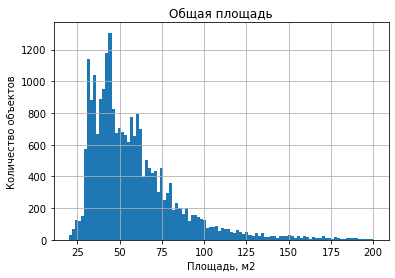

In [18]:
hist(df,'total_area', 'Количество объектов','Площадь, м2', 'Общая площадь', 100, 20, 200)

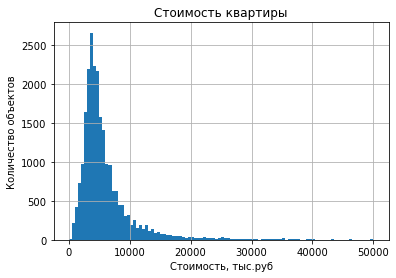

In [19]:
hist(df,'last_price', 'Количество объектов','Стоимость, тыс.руб', 'Стоимость квартиры', 100, 0, 50000)

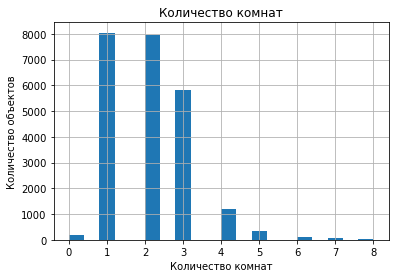

In [20]:
hist(df,'rooms', 'Количество объектов','Количество комнат', 'Количество комнат', 20, 0,8)

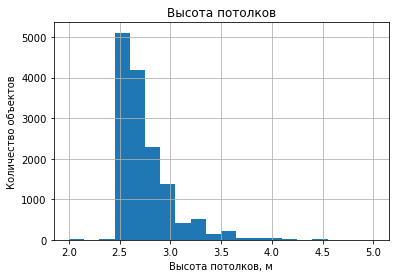

In [21]:
hist(df,'ceiling_height', 'Количество объектов','Высота потолков, м', 'Высота потолков', 20, 2,5)

## Выводы
### Распределение продаж квартир по площади
Гистограма представляет собой классическое распределение Пуассона. Основной рынок квартир приходится на квартиры 30 - 45 м2,что соотвтествует однокомнатной квартире, далее есть пики на площадях 60 и 70 м2, что является средней площадью двух и трехкомнатных квартир. Более 100м2 продажи не велики по количеству объектов, но наверное существенны в рублях. Для сглаживания влияния выбросов надо удалить эти данные из анализа  
### Распределение продаж квартир по стоимости объекта
Гистограма представляет собой классическое распределение Пуассона. Резкий пик в районе 4 млн. рублей. Квартир более 20 млн - очень мало. Для сглаживания влияния выбросов надо удалить эти данные из анализа 
### Распределение продаж квартир по количеству комнат
Основные продажи приходятся на одно и двух комнатные квартиры. Также велика доля трехкомнатных. Продажи остальных незначительны.
### Распределение продаж квартир по высоте потолков
Основной рынок сосредоточен на помещениях с потолками 2,5 - 2,7 м, также маленький пик есть на 3м. Видимо для данного города это стандарты строительства.

## 5. Удаление редких и выбивающихся значений.

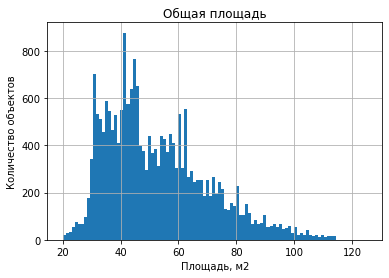

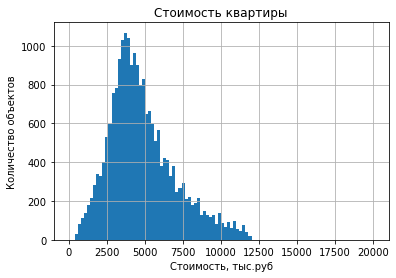

In [22]:
# Определим границы обрезания данных по стоимости и площади квартиры
# Функция нахождения границ аномальных данных
def good_data(column):
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_v = q1 - 1.5*iqr
    max_v = q3 + 1.5*iqr
    return([min_v,max_v])
# Вывод диапазонов
good_data_lim_area = good_data('total_area')
good_data_lim_price = good_data('last_price')
# Т.к. нижнее значение уходит в минус, то ограничиваем только по верхнему
area_lim = good_data_lim_area[1]
price_lim = good_data_lim_price[1]
# Обрежем данные по границам
df = df.query('total_area < @area_lim')
df = df.query('last_price < @price_lim')

# Сравним новые результаты с предыдущими
def hist(df, column, y, x, title, bins,range_min, range_max):
    df[column].hist(bins=bins, range = (range_min, range_max))
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title)
    plt.show() 
    return 

hist(df,'total_area', 'Количество объектов','Площадь, м2', 'Общая площадь', 100, 20, 125)
hist(df,'last_price', 'Количество объектов','Стоимость, тыс.руб', 'Стоимость квартиры', 100, 0, 20000)


## Выводы
    Мы сократили выборку удалив аномальные значения лежащие за пределами 3Q + 1.5 * IQR, где IQR — межквартильный размах.

## 6. Распределение продаж квартир по продолжительности реализации объекта

count    18846.000000
mean       172.073172
std        210.126514
min          1.000000
25%         43.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

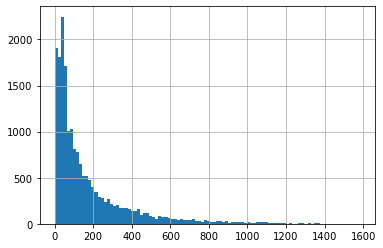

In [23]:
# Гистограмма и основные показатели Продолжительности продажи
df['days_exposition'].hist(bins=100)
df['days_exposition'].describe()

## Выводы
    Медианное (91 дней) и среднее (172 дней) значение сильно отличаются, что говорит о больших выбросах от среднего значения в сторону больших чисел. Основные продажи происходят до 100 дней, и этот срок является удолетворительным для продажи квартиры. Более 218 дней продается всего 25% квартир и это долго.   

## 7. Зависимость цены квартиры от ее параметров 

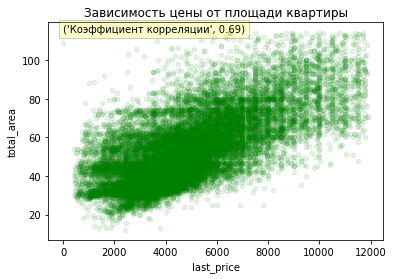

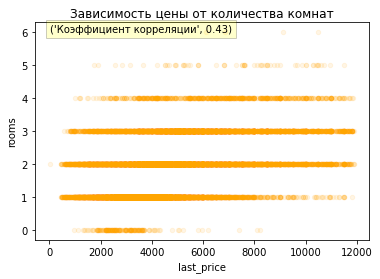

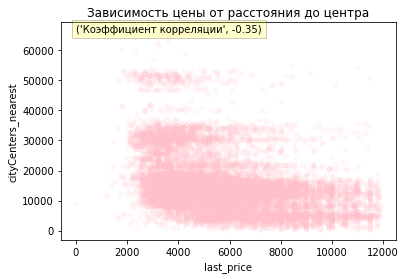

In [24]:
# Функция создания диаграммы рассеивания
def scatterplot(title, x, y, color):
    k = df[x].corr(df[y]).round(2)
    max = df[y].max()
    df.plot(x = x, y = y, title = title, color = color, kind='scatter', alpha=0.1)
    plt.text(1.1,max,('Коэффициент корреляции', k), fontsize=10, bbox={'facecolor':'yellow','alpha':0.2})
    plt.show()
# Выод диаграмм
scatterplot('Зависимость цены от площади квартиры','last_price', 'total_area', 'green')
scatterplot('Зависимость цены от количества комнат','last_price', 'rooms', 'orange')
scatterplot('Зависимость цены от расстояния до центра','last_price', 'cityCenters_nearest', 'pink')

#### Подвывод
1. Влияние площади квартиры на цену
Влияние сильное (коэффициент корреляции 0.69). Практически прямая зависимость, что логично,т.к. это основной параметр.
2. Влияние количества комнат на цену
Влияние намного слабее (коэффициент корреляции 0.43). Это связано с тем, что площадь и количетво комнат также слабо коррелируют друг с другом. Квартира площадью 50 метров может быть 1,2,3-комнатной
3. Влияние удаленности от центра на цену
Чем дальше от центра, тем должно быть дешевле. Эта зависимость прослеживается и здеь, но странно, что в небольшой степени (коэффициент корреляции 0.35). Возможно это связано что есть удаленные от центра районы, в которых цена недвижимости высока.

,cityCenters_nearest,rooms,total_area
cityCenters_nearest,1.000000,-0.236135,-0.330179
rooms,-0.236135,1.000000,0.840026
total_area,-0.330179,0.840026,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020384415790>,
      dtype=object)

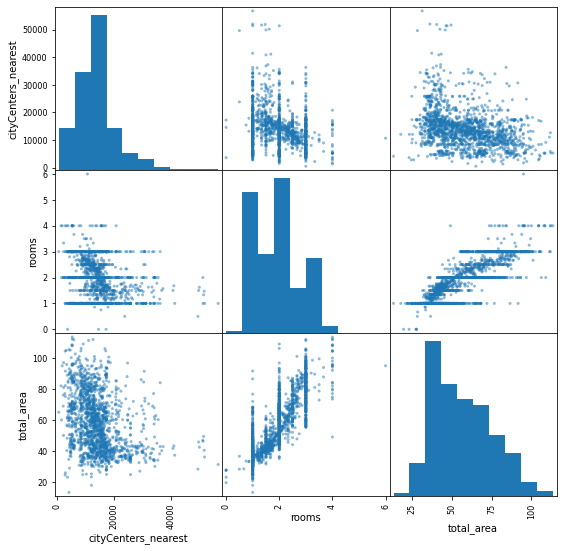

In [25]:
# Содздание матрицы зависимостей
multi_stat = df.pivot_table(index='last_price', values=['total_area','rooms', 'cityCenters_nearest'])
display(multi_stat.corr())
pd.plotting.scatter_matrix(multi_stat, figsize=(9, 9))

#### Подвывод
    Сильная зависимость только у площади квартиры и количества комнат, что естественно.

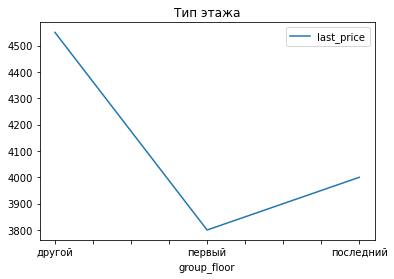

In [26]:
# Строим зависимость цены от этажа
df.pivot_table(index='group_floor', values='last_price', aggfunc='median').plot(title='Тип этажа')

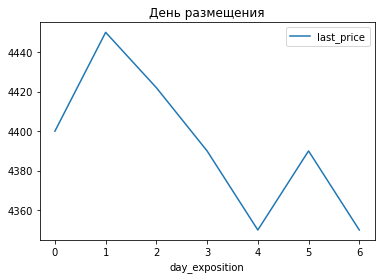

In [27]:
# Строим зависимость цены от дня недели
df.pivot_table(index='day_exposition', values='last_price', aggfunc='median').plot(title='День размещения')

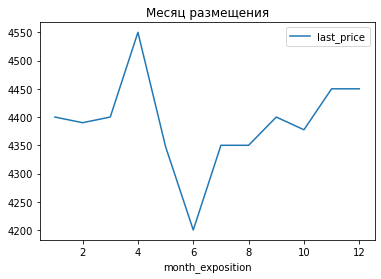

In [28]:
# Строим зависимость цены от месяца
df.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(title='Месяц размещения')

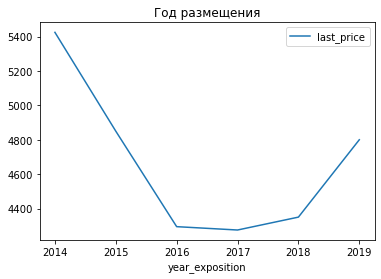

In [29]:
# Строим зависимость цены от года
df.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(title='Год размещения')

#### Подвывод
1. Без сюрппризов, самый дешевый - первый, чуть дороже последний.
2. Наиболее выгодно размещать объявление во вторник, наименее - в воскресенье. НА выходных никто объявления не смотрит.
3. Наиболее выгодно размещать объявление в мае, наименее - в июле. Летом все отдыхают.
4. 2014 год - лучший, потом до 2016 в связи с экономическим кризисом, проходило падение цен при падении спроса. В 2016-2018 ситуция стабилизировалась, а 2019 даже небольшой рост был. Что нам принесет чудный 2020?

## Выводы
### Влияние площади квартиры на цену
Влияние сильное (коэффициент корреляции 0.65). Практически прямая зависимость, что логично,т.к. это основной параметр.
### Влияние количества комнат на цену
Влияние намного слабее (коэффициент корреляции 0.36). Это связано с тем, что площадь и количетво комнат также слабо коррелируют друг с другом. Квартира площадью 50 метров может быть 1,2,3-комнатной
### Влияние удаленности от центра на цену
Чем дальше от центра, тем должно быть дешевле. Эта зависимость прослеживается и здеь, но странно, что в небольшой степени (коэффициент корреляции 0.26). Возможно это связано что есть удаленные от центра районы, в которых цена недвижимости высока.
### Взаимное влияние факторв площади, комнат, удаленности
Сильная зависимость только у площади квартиры и количества комнат, что естественно. Остальные параметры слабо коррелируют
### Влияние этажа на цену
Без сюрппризов, самый дешевый - первый, чуть дороже последний.
### Влияние дня недели на цену
Наиболее выгодно размещать объявление во вторник, наименее - в воскресенье. НА выходных никто объявления не смотрит.
### Влияние месяца на цену
Наиболее выгодно размещать объявление в мае, наименее - в июле. Летом все отдыхают.
### Влияние года на цену
2014 год - лучший, потом до 2016 в связи с экономическим кризисом, проходило падение цен при падении спроса. В 2016-2018 ситуция стабилизировалась, а 2019 даже небольшой рост был. Что нам принесет чудный 2020?

## 8. Анализ недвижимости в центре Санкт-Петербурга

In [30]:
# Выбираем 10 населенных пунктов с  с наибольшим числом объявлений
locality_10 = df['locality_name'].value_counts().head(10)
# Создаем нвый df с выборкой
df_l10 = df.query("locality_name in @locality_10.index")
# Смотрим среднюю стоимость квартир по выбранным локациям
df_l10.groupby('locality_name')['last_price'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      5622.681414
Пушкин               5309.880952
посёлок Парголово    4477.604294
деревня Кудрово      4204.708054
посёлок Шушары       4073.807780
Колпино              3827.423881
Всеволожск           3698.796954
посёлок Мурино       3672.021073
Гатчина              3415.973597
Выборг               3070.241228
Name: last_price, dtype: float64

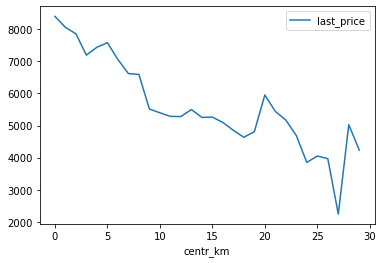

In [31]:
# Предложения квартир по удаленности от центра
# Отбор данных по объявлениям только в Санкт-Петербурге и создание нового df
df_spb = df.query("locality_name == 'Санкт-Петербург'").reset_index(drop=True)
# Добавление столбца Расстояние от центра в км, округленное до целого.
df_spb['centr_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)
# График зависимости цены от расстояния
df_spb.pivot_table(index='centr_km', values='last_price', aggfunc='mean').plot()

In [32]:
# Делаем срез по расстоянию от центра
df_spb_centr = df_spb.query('centr_km < 8').reset_index(drop=True)

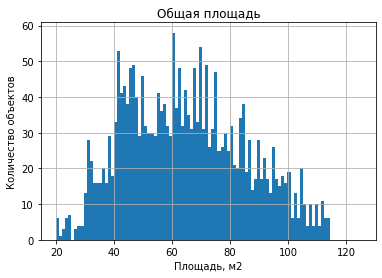

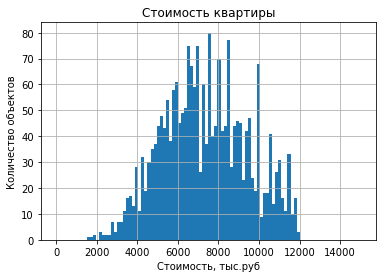

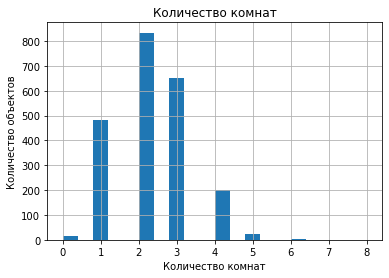

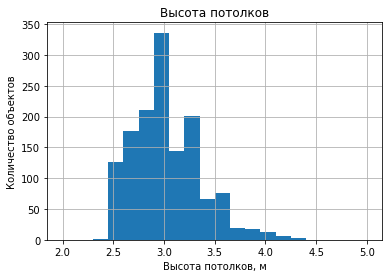

In [33]:
# Строим гистограммы с наложением, чтобы сравнить данные из общей выборки и центральной
hist(df_spb_centr,'total_area', 'Количество объектов','Площадь, м2', 'Общая площадь', 100, 20, 125)
hist(df_spb_centr,'last_price', 'Количество объектов','Стоимость, тыс.руб', 'Стоимость квартиры', 100, 0, 15000)
hist(df_spb_centr,'rooms', 'Количество объектов','Количество комнат', 'Количество комнат', 20, 0,8)
hist(df_spb_centr,'ceiling_height', 'Количество объектов','Высота потолков, м', 'Высота потолков', 20, 2, 5)

## Выводы
### Центральная область
Центральной областью является область с расстоянием до центра менее 8 км
### Параметры рынка недвижимости внутри центральной области
1. Пик продаж приходится на квартиры площадью 70-80 м2, что существенно выше, чем в общей таблице
2. Медианное значение цены квартиры - 9,2 млн рублей, что также существенно выше.
3. Лидерами по количеству комнат являются трехкомнатные кватиры в отличии от 1-2 комнатных в общей таблице
4. Существенно больше высоких полков 2,7 и 3 метра, а низких 2,5 и 2,6 сильно меньше.

# Общие выводы
1. Основной рынок квартир приходится на квартиры 30 - 45 м2 с высотой потолков 2,5-2,7 м,что соотвтествует однокомнатной квартире, далее есть пики на площадях 60 и 70 м2, что является средней площадью двух и трехкомнатных квартир.
2. Основные продажи происходят до 100 дней, и этот срок является удолетворительным для продажи квартиры. Более 232 дней продается всего 25% квартир и это долго. 
3. На цену квартиры в определенном районе больше всего влияет ее площадь. Дешевле стоят квартиры на первом и последнем этажах.
4. Удаление от центра не так сильно влияет на цену, как могло бы. Возможно это связано что есть удаленные от центра районы, в которых цена недвижимости высока.
5. Лучшее время для продажи вторник в мае, а худщее воскресенье в июле.
6. После 2 лет стабилизации цены на недвижимость начали расти
7. Центральной областью является область с расстоянием до центра менее 8 км. В этой области по сравнению со всем рынком продаются более дорогие квартиры, большей площадью и комнатностью с высокими потолками.
